In [390]:
import pickle
import numpy as np

In [391]:
q_table_counts = np.load("./data/EPS/q_table.npy")

q_table_counts = q_table_counts.flatten()

print(np.count_nonzero(q_table_counts))
print(np.size(q_table_counts))

5939
20736


In [392]:
with open('data/EPS/scores.p', 'rb') as file:
    scores = pickle.load(file)

print(scores)

{'Sum_Rewards': [39, 18, 12, 31, 75, 21, 41, 30, 24, 50, 10, 21, 24, 19, 30, 33, 21, 8, 36, 21, 24, 9, 8, 28, 53, 13, 50, 20, 62, 18, 22, 10, 25, 27, 29, 21, 14, 38, 25, 52, 21, 19, 48, 13, 23, 15, 51, 10, 57, 41, 44, 24, 24, 14, 49, 17, 28, 38, 53, 8, 8, 32, 33, 11, 27, 7, 11, 10, 34, 22, 16, 33, 18, 64, 20, 10, 19, 41, 28, 29, 53, 21, 24, 37, 15, 40, 17, 52, 27, 46, 13, 28, 68, 26, 18, 14, 35, 55, 25, 12, 54, 28, 46, 43, 4, 13, 13, 26, 9, 9, 21, 34, 28, 16, 19, 25, 20, 19, 14, 25, 19, 12, 21, 6, 11, 10, 14, 29, 67, 16, 11, 40, 33, 12, 41, 25, 20, 16, 23, 62, 22, 17, 19, 27, 37, 31, 45, 12, 25, 57, 32, 13, 7, 17, 28, 42, 8, 49, 19, 43, 29, 22, 12, 70, 11, 25, 47, 30, 24, 16, 8, 36, 12, 9, 53, 15, 22, 24, 49, 13, 26, 31, 15, 58, 42, 43, 12, 15, 16, 32, 19, 78, 25, 31, 43, 44, 11, 8, 53, 48, 61, 23, 17, 49, 45, 18, 26, 52, 11, 50, 40, 57, 18, 87, 95, 62, 26, 32, 35, 18, 14, 102, 56, 22, 53, 34, 45, 46, 33, 53, 16, 15, 73, 37, 44, 25, 44, 26, 24, 8, 40, 57, 41, 57, 15, 67, 6, 27, 13, 8, 

In [393]:
sum_rewards = scores['Sum_Rewards']
avg_rewards = scores['Mean_Rewards']
list_temp = scores['Reward_Dict']



len(list_temp)

9000

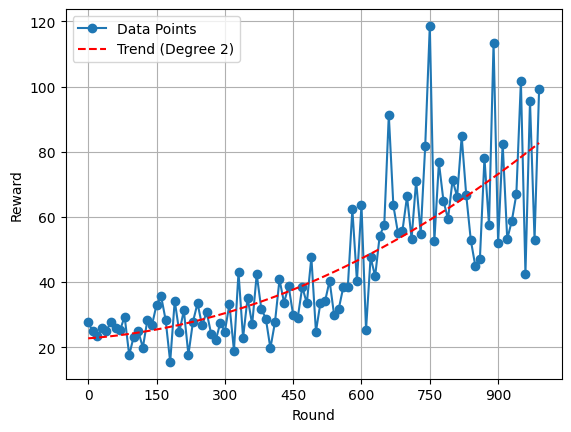

In [394]:
# get last 1000 items of sum_rewards    
sum_rewards = sum_rewards[2000:3001]



def calculate_rolling_average(data, window_size=10):
    rolling_averages = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        average = sum(window) / window_size
        rolling_averages.append(average)
    return rolling_averages

# Specify the window size for the rolling average
window_size = 10  # Adjust this as needed

# Calculate the rolling average
rolling_averages = calculate_rolling_average(sum_rewards, window_size)[::10]
keys = [10*value-10 for value in range(1, len(rolling_averages) + 1)]
values = rolling_averages

import matplotlib.pyplot as plt


# Create a line graph
plt.plot(keys, values, marker='o', linestyle='-', label='Data Points')

# Fit a polynomial trend line (adjust the degree as needed)
degree = 2
coefficients = np.polyfit(keys, values, degree)
trend_values = np.polyval(coefficients, keys)

# Plot the trend line
plt.plot(keys, trend_values, linestyle='--', label=f'Trend (Degree {degree})', color='red')

# Add labels and title
plt.xlabel('Round')
plt.ylabel('Reward')

# Customize x-axis tick labels
plt.xticks(keys)

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.locator_params(axis='both', nbins=7)

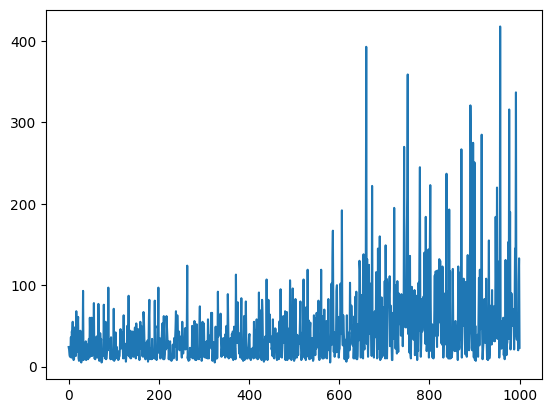

In [395]:
import matplotlib.pyplot as plt

plt.plot(sum_rewards)



In [396]:
from collections import defaultdict
import json

# Collect all keys from the list of dictionaries

all_keys = set()
for entry in list_temp:
    all_keys.update(entry.keys())

# Create a dictionary with lists of values
result_dict = defaultdict(list)

# Iterate through the list of dictionaries and accumulate values
for entry in list_temp:
    for i, (key, value) in enumerate(entry.items()):
        result_dict[key].append(value)

    for key_temp in all_keys.difference(entry.keys()):
        result_dict[key_temp].append(0)

In [397]:
print(all_keys)

{'COIN_FURTHER', 'ESCAPABLE_BOMB', 'ESCAPING_BOMB_PARTLY', 'CRATE_DESTROYED', 'KILLED_OPPONENT', 'INVALID_ACTION', 'GOT_KILLED', 'KILLED_SELF', 'RUNNING_INTO_BOMB', 'WAITED_TOO_LONG', 'RUNNING_INTO_BOMB_PARTLY', 'INVALID_MOVE_MANUAL', 'WAITED_TOO_LONG_JUMPING', 'COIN_CLOSER', 'COIN_COLLECTED', 'ESCAPING_BOMB_FULLY', 'VALID_MOVE_MANUAL'}


In [398]:
import os
import json

# Define the folder path
folder_path = '../../results/training_scores'

# Get a list of JSON files in the folder and sort them by modification date (oldest first)
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
json_files = sorted(json_files, key=lambda f: os.path.getmtime(os.path.join(folder_path, f)))

# Initialize an empty list to store the scores
scores_list = []
coin_list = []

# Iterate through the sorted JSON files
for filename in json_files:
    file_path = os.path.join(folder_path, filename)
    
    # Read the JSON data from the file
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        
        # Extract the scores for the "knorr_sindlinger_v2" agent in each round
        agent_scores = data['by_round']['Agent knorr_sindlinger_v2 under control of knorr_sindlinger_v2']
        
        # Append the scores for each round to the scores_list
        for round_data in agent_scores.values():
            scores_list.append(round_data['score'])
            coin_list.append(round_data['coins'])

# Now, scores_list contains the scores for the "knorr_sindlinger_v2" agent in all files and all rounds (oldest files first)
print(scores_list)



[7, 4, 3, 4, 7, 3, 3, 2, 2, 11, 2, 6, 8, 4, 9, 3, 0, 3, 1, 5, 0, 1, 0, 3, 7, 3, 2, 2, 6, 2, 4, 1, 3, 2, 4, 2, 5, 1, 2, 1, 2, 8, 10, 6, 4, 1, 7, 7, 2, 3, 4, 2, 3, 5, 3, 7, 3, 1, 5, 5, 8, 5, 8, 0, 3, 4, 10, 3, 0, 1, 3, 12, 6, 0, 8, 3, 1, 11, 3, 2, 1, 7, 3, 5, 4, 5, 5, 4, 1, 0, 5, 2, 1, 10, 3, 4, 3, 6, 0, 0, 7, 4, 1, 4, 9, 8, 4, 4, 5, 2, 0, 2, 7, 11, 7, 10, 9, 1, 0, 14, 5, 8, 9, 2, 2, 7, 5, 4, 5, 8, 1, 1, 4, 4, 8, 4, 13, 7, 12, 2, 2, 8, 1, 4, 2, 8, 4, 4, 8, 7, 5, 6, 5, 1, 5, 4, 5, 11, 5, 11, 4, 3, 4, 4, 4, 1, 7, 6, 8, 7, 0, 3, 0, 5, 1, 2, 1, 4, 10, 5, 2, 4, 3, 8, 5, 0, 0, 7, 10, 0, 8, 13, 5, 4, 2, 7, 4, 4, 5, 1, 5, 7, 2, 2, 3, 9, 0, 8, 5, 6, 4, 6, 9, 9, 7, 2, 0, 12, 6, 4, 7, 2, 5, 3, 4, 10, 0, 2, 7, 8, 4, 9, 5, 3, 2, 2, 1, 9, 6, 8, 8, 1, 11, 4, 8, 4, 12, 1, 2, 11, 5, 1, 1, 10, 8, 7, 9, 6, 4, 6, 1, 6, 8, 3, 4, 8, 7, 5, 5, 9, 5, 4, 2, 5, 5, 7, 11, 8, 4, 1, 5, 3, 8, 7, 9, 5, 7, 2, 10, 5, 6, 8, 8, 2, 9, 11, 3, 1, 8, 4, 9, 12, 0, 10, 7, 11, 17, 3, 6, 17, 3, 10, 10, 1, 4, 7, 6, 13, 2, 6, 2, 10,

[1.0, 1.0, 2.0, 2.0, 1.5, 2.5, 2.0, 2.0, 2.5, 1.0, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 2.0, 2.0, 0.5, 2.5, 2.5, 0.5, 0.5, 3.0, 3.5, 1.5, 1.5, 2.5, 5.5, 5.0, 2.5, 1.5, 0.5, 2.5, 2.5, 2.0, 2.0, 1.0, 1.5, 1.5, 1.0, 4.5, 4.5, 1.0, 1.0, 3.5, 4.0, 1.5, 1.0, 2.5, 3.5, 3.5, 3.0, 2.5, 2.5, 2.0, 3.5, 5.0, 5.5, 6.0, 7.0, 6.0, 3.5, 5.0, 7.0, 5.5, 6.0, 6.0, 7.0, 18.0, 21.0, 9.5, 6.5, 8.0, 8.0, 12.0, 13.0, 11.5, 8.5, 7.5, 8.5, 5.5, 5.0, 9.5, 10.0, 9.5, 7.5, 14.5, 15.0, 6.0, 8.0, 11.0, 10.5, 4.5, 3.0, 3.5, 6.0, 7.0]
[1.0, 1.0, 2.0, 2.0, 1.5, 2.5, 2.0, 2.0, 2.5, 1.0, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 1.0, 0.5, 2.0, 2.0, 0.5, 2.5, 2.5, 0.5, 0.5, 3.0, 3.5, 1.5, 1.5, 2.5, 5.5, 5.0, 2.5, 1.5, 0.5, 2.5, 2.5, 2.0, 2.0, 1.0, 1.5, 1.5, 1.0, 4.5, 4.5, 1.0, 1.0, 3.5, 4.0, 1.5, 1.0, 2.5, 3.5, 3.5, 3.0, 2.5, 2.5, 2.0, 3.5, 5.0, 5.5, 6.0, 7.0, 6.0, 3.5, 5.0, 7.0, 5.5, 6.0, 6.0, 7.0, 18.0, 21.0, 9.5, 6.5, 8.0, 8.0, 12.0, 13.0, 11.5, 8.5, 7.5, 8.5, 5.5, 5.0, 9.5, 10.0, 9.5, 7.5, 14.5, 15.0, 6.0, 8.0, 11.0, 10.5, 4.5

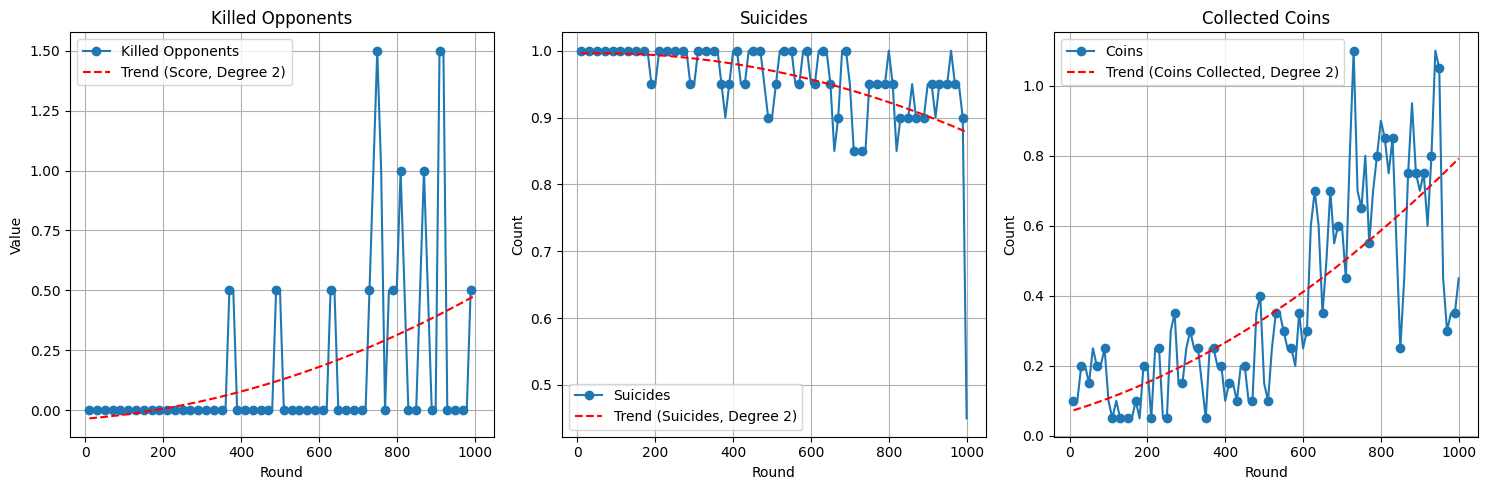

In [399]:
def calculate_averages(data_list_temp):
    averages = []
    step = 100
    for i in range(0, len(data_list_temp), step):
        chunk = data_list_temp[i:i + step]
        average = sum(chunk) / len(chunk)
        averages.append(average)
    return averages

def calculate_sums(data_list):
    sums = []
    temp_sums = []
    step = 10
    for i in range(0, len(data_list), step):
        chunk = data_list[i:i + step]
        total_sum = sum(chunk)
        temp_sums.append(total_sum)
    return calculate_rolling_average(temp_sums, 2)


rolling_average_killed_opponent = [x for x in calculate_sums(result_dict['KILLED_OPPONENT'][2000:3001])]

rolling_average_coins_collected = [x / 10 for x in calculate_sums(coin_list[2000:3001])]

rolling_average_suicide = [x / 10 for x in calculate_sums(result_dict['KILLED_SELF'][2000:3001])]


print(calculate_sums(scores_list[2000:3001]))

rolling_averages_score = [x for x in calculate_sums(scores_list[2000:3001])]

print(rolling_averages_score)

# Create a function to format the y-ticks
def divide_by_10(x, pos):
    return f'{x / 10:.0f}'





import matplotlib.pyplot as plt
import numpy as np

# Define the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns of subplots

keys = [x*10 for x in list(range(1, len(rolling_averages_score)+1))]
values = rolling_average_killed_opponent

# Create a line graph for the first value list with markers
axs[0].plot(keys, values, marker='o', linestyle='-', label='Killed Opponents', markevery=2)

# Fit a polynomial trend line (adjust the degree as needed) for the first value list
degree = 2
coefficients = np.polyfit(keys, values, degree)
trend_values = np.polyval(coefficients, keys)
axs[0].set_xlabel('Round')
axs[0].set_ylabel('Value')
axs[0].set_title('Killed Opponents')
axs[0].plot(keys, trend_values, linestyle='--', label=f'Trend (Score, Degree {degree3})', color='red')





values = rolling_average_suicide
# Create a line graph for the second value list with markers
axs[1].plot(keys, values, marker='o', linestyle='-', label='Suicides', markevery=2)
axs[1].set_xlabel('Round')
axs[1].set_ylabel('Count')
axs[1].set_title('Suicides')

# Fit a polynomial trend line (adjust the degree as needed) for the second value list
degree2 = 2
coefficients2 = np.polyfit(keys, values, degree2)
trend_values2 = np.polyval(coefficients2, keys)
axs[1].plot(keys, trend_values2, linestyle='--', label=f'Trend (Suicides, Degree {degree2})', color='red')


# Your previous code for the third value list
# ...

values = rolling_average_coins_collected
# Create a line graph for the third value list with markers
axs[2].plot(keys, values, marker='o', linestyle='-', label='Coins', markevery=2)
axs[2].set_xlabel('Round')
axs[2].set_ylabel('Count')
axs[2].set_title('Collected Coins')

# Fit a polynomial trend line (adjust the degree as needed) for the third value list
degree3 = 2
coefficients3 = np.polyfit(keys, values, degree3)
trend_values3 = np.polyval(coefficients3, keys)
axs[2].plot(keys, trend_values3, linestyle='--', label=f'Trend (Coins Collected, Degree {degree3})', color='red')




# Add labels and title to each subplot
for ax in axs:
    ax.grid(True)
    ax.locator_params(axis='both', nbins=7)
    ax.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()




# Show the plots
plt.show()



In [403]:
coin_list[2800:3001]

[0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 4,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 3,
 0,
 0,
 2,
 1,
 0,
 0,
 4,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 2,
 4,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 3,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 5,
 0,
 0,
 1,
 1,
 3,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 4]

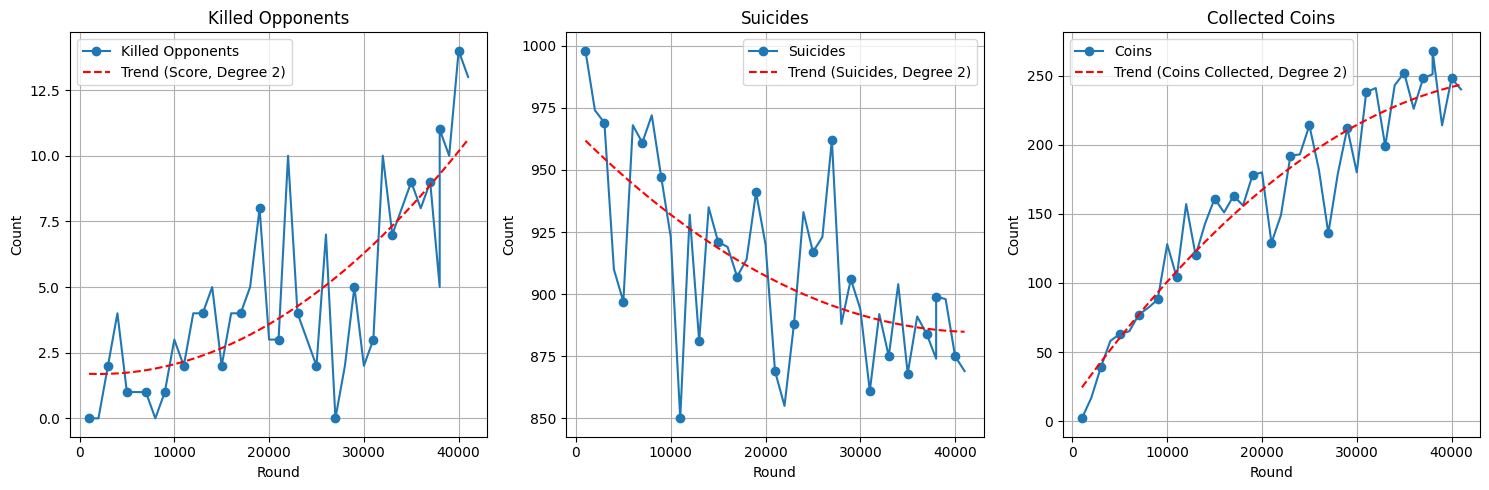

In [400]:
rolling_average_killed_opponent = [0, 0, 2, 4, 1, 1, 1, 0, 1, 3, 2, 4, 4, 5, 2, 4, 4, 5, 8, 3, 3, 10, 4, 3, 2, 7, 0, 2, 5, 2, 3, 10, 7, 8, 9, 8, 9, 5, 11, 10, 14, 13]
rolling_average_coins_collected = [2, 17, 39, 58, 63, 65, 77, 82, 88, 128, 104, 157, 120, 143, 161, 151, 163, 156, 178, 180, 129, 149, 192, 193, 214, 182, 136, 179, 212, 180, 238, 241, 199, 243, 252, 226, 248, 251, 268, 214, 248, 240]
rolling_averages_score = [2, 17, 49, 78, 68, 70, 82, 82, 93, 143, 114, 177, 140, 168, 171, 171, 183, 181, 218, 195, 144, 199, 212, 208, 224, 217, 136, 189, 237, 190, 253, 291, 234, 283, 297, 266, 293, 276, 323, 264, 318, 305]
rolling_average_suicide = [998, 974, 969, 910, 897, 968, 961, 972, 947, 923, 850, 932, 881, 935, 921, 919, 907, 914, 941, 920, 869, 855, 888, 933, 917, 923, 962, 888, 906, 894, 861, 892, 875, 904, 868, 891, 884, 874, 899, 898, 875, 869]
SURVIVED_ROUND = [0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 3, 0, 3, 2, 1, 1, 0, 0, 5, 4, 5, 2, 1, 4, 0, 1, 0, 0, 1, 2, 2, 1, 0, 2, 1, 2, 2, 1, 1, 5]





keys = [
    1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 38000, 39000, 40000, 41000
]
# Create a function to format the y-ticks
def divide_by_10(x, pos):
    return f'{x / 10:.0f}'

import matplotlib.pyplot as plt
import numpy as np

# Define the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns of subplots
values = rolling_average_killed_opponent

# Create a line graph for the first value list with markers
axs[0].plot(keys, values, marker='o', linestyle='-', label='Killed Opponents', markevery=2)

# Fit a polynomial trend line (adjust the degree as needed) for the first value list
degree = 2
coefficients = np.polyfit(keys, values, degree)
trend_values = np.polyval(coefficients, keys)
axs[0].set_xlabel('Round')
axs[0].set_ylabel('Count')
axs[0].set_title('Killed Opponents')
axs[0].plot(keys, trend_values, linestyle='--', label=f'Trend (Score, Degree {degree3})', color='red')





values = rolling_average_suicide
# Create a line graph for the second value list with markers
axs[1].plot(keys, values, marker='o', linestyle='-', label='Suicides', markevery=2)
axs[1].set_xlabel('Round')
axs[1].set_ylabel('Count')
axs[1].set_title('Suicides')

# Fit a polynomial trend line (adjust the degree as needed) for the second value list
degree2 = 2
coefficients2 = np.polyfit(keys, values, degree2)
trend_values2 = np.polyval(coefficients2, keys)
axs[1].plot(keys, trend_values2, linestyle='--', label=f'Trend (Suicides, Degree {degree2})', color='red')


# Your previous code for the third value list
# ...

values = rolling_average_coins_collected
# Create a line graph for the third value list with markers
axs[2].plot(keys, values, marker='o', linestyle='-', label='Coins', markevery=2)
axs[2].set_xlabel('Round')
axs[2].set_ylabel('Count')
axs[2].set_title('Collected Coins')

# Fit a polynomial trend line (adjust the degree as needed) for the third value list
degree3 = 2
coefficients3 = np.polyfit(keys, values, degree3)
trend_values3 = np.polyval(coefficients3, keys)
axs[2].plot(keys, trend_values3, linestyle='--', label=f'Trend (Coins Collected, Degree {degree3})', color='red')


# Add labels and title to each subplot
for ax in axs:
    ax.grid(True)
    ax.locator_params(axis='both', nbins=7)
    ax.legend()

# Adjust the layout to prevent overlap
plt.tight_layout()




# Show the plots
plt.show()



In [401]:
import os

def find_latest_json_file(directory_path):
    """
    Find the latest JSON file in the specified directory.

    Args:
        directory_path (str): The path to the directory containing JSON files.

    Returns:
        str: The full path to the latest JSON file, or None if no JSON files are found.
    """
    # List all files in the directory
    files = os.listdir(directory_path)

    # Filter JSON files based on the '.json' extension and sort by filename
    json_files = [file for file in files if file.endswith('.json')]
    json_files.sort()

    if json_files:
        # The latest JSON file will be the last one in the sorted list
        latest_json_file = json_files[-1]

        # Get the full path to the latest JSON file
        latest_json_file_path = os.path.join(directory_path, latest_json_file)

        return latest_json_file_path
    else:
        return None

# Example usage:
directory_path = '../../results/'
latest_json = find_latest_json_file(directory_path)
print(f"Latest JSON file: {latest_json}")


# Open the JSON file for reading
with open(latest_json, 'r') as json_file:
    # Parse the JSON data into a Python dictionary
    data_dict = json.load(json_file)



sum_of_scores = {key: value['score'] for key, value in data_dict["by_agent"].items()}
sum_of_suicides = {key: value['suicides'] for key, value in data_dict["by_agent"].items()}
sum_of_kills = {key: value['kills'] for key, value in data_dict["by_agent"].items()}


print(sum_of_scores)
print(sum_of_suicides)
print(sum_of_kills)

Latest JSON file: ../../results/only_rule_based.json
{'rule_based_agent_0': 307, 'rule_based_agent_1': 322, 'rule_based_agent_2': 346, 'rule_based_agent_3': 306}
{'rule_based_agent_0': 60, 'rule_based_agent_1': 45, 'rule_based_agent_2': 52, 'rule_based_agent_3': 55}
{'rule_based_agent_0': 16, 'rule_based_agent_1': 19, 'rule_based_agent_2': 26, 'rule_based_agent_3': 17}
